In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
!mkdir train

In [4]:
!mkdir ./train/Ascochyta_Blight
!mkdir ./train/Bacteria_blight
!mkdir ./train/cercospora
!mkdir ./train/Fresh_leaf
!mkdir ./train/Target_spot

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trg=ImageDataGenerator(rescale=1/255)
tgenerator=trg.flow_from_directory(
        '/content/drive/MyDrive/train',
        target_size=(150, 150))

Found 31 images belonging to 5 classes.


In [4]:
xb1,yb1=next(iter(tgenerator))

In [5]:
bm=tf.keras.applications.vgg16.VGG16(input_shape=(150,150,3),include_top=False,  weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
bm.trainable=False

In [7]:
xb = bm(xb1)

In [8]:
pl=tf.keras.layers.Dense(5)
global_average_layer=tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average=global_average_layer(xb)
prediction_batch=pl(feature_batch_average)

In [9]:
feature_batch_average.shape

TensorShape([31, 512])

In [10]:
inp=tf.keras.Input(shape=(150,150,3))
x=bm(inp,training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
out=pl(x)
m=tf.keras.Model(inp,out)

In [11]:
m.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
tx=np.asarray(yb1)
ty=np.asarray(xb1)

In [16]:
m.fit(ty,tx,epochs=1)

1/1 [==============================] - 6s 6s/step - loss: 0.9096 - accuracy: 0.9032


In [17]:
m.save('model.h5')

In [ ]:
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 dense (Dense)               (None, 4, 4, 5)           20        
                                                                 
Total params: 14,714,708
Trainable params: 20
Non-trainable params: 14,714,688
_________________________________________________________________


In [46]:
label=tgenerator.classes
len(label)

31

In [47]:
label=['a Blight','Bacteria blight','Fresh leaf','Target spot','Cercospora']

In [108]:
tsg=ImageDataGenerator(rescale=1/255)
tsgenerator=trg.flow_from_directory(
        '/content/drive/MyDrive/test',
        target_size=(150, 150))

Found 1 images belonging to 1 classes.


In [109]:
q,_=next(tsgenerator)

In [110]:
pred=m.predict(q)

In [111]:
a=label[np.argmax(pred[0])],

Text(0.5, 0, 'Fresh leaf')

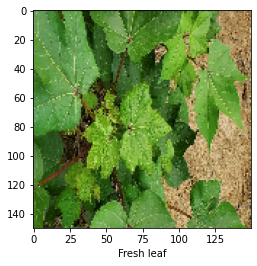

In [112]:
plt.imshow(q[0])
plt.xlabel(b)